### 다항회귀
- 직선으로 많은 데이터를 만족할 수 없는 선형회귀 경우 사용
- 기존 피쳐를 조합해서 항을 늘이는 작업 진행 at 전처리

In [26]:
import numpy as np 
X = np.arange(4).reshape(2,-1,1)
X.shape

(2, 2, 1)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.preprocessing import PolynomialFeatures

In [28]:
# 임의의 데이터 생성 ==> 2D
X = np.arange(10).reshape(-1,2)						# 피쳐 2개 / 2열로 만든 뒤, 행은 자동으로 생성
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [29]:
## 피쳐 2개 ==> 조합해서 늘리기
poly = PolynomialFeatures(include_bias=False)	# 절편값 생성 X

# 1)
poly.fit(X)
aaa = poly.transform(X)				

# 2)
bbb = poly.fit_transform(X)					# 1)과 같은 결과

print(aaa)
print()
print(bbb)

[[ 0.  1.  0.  0.  1.]
 [ 2.  3.  4.  6.  9.]
 [ 4.  5. 16. 20. 25.]
 [ 6.  7. 36. 42. 49.]
 [ 8.  9. 64. 72. 81.]]

[[ 0.  1.  0.  0.  1.]
 [ 2.  3.  4.  6.  9.]
 [ 4.  5. 16. 20. 25.]
 [ 6.  7. 36. 42. 49.]
 [ 8.  9. 64. 72. 81.]]


In [30]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [31]:
## 피쳐 2개 ==> 조합해서 늘리기
poly = PolynomialFeatures(include_bias=False, degree=4)		# 절편값 생성 X & 4차
		
X1 = poly.fit_transform(X)		
print(X1.shape)

poly.get_feature_names_out()

(5, 14)


array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4'],
      dtype=object)

In [32]:
# 임의의 데이터 생성 ==> 2D
X = np.arange(10).reshape(-1,2)						# 피쳐 2개 / 2열로 만든 뒤, 행은 자동으로 생성
y = np.arange(5)

X.shape, y.shape

((5, 2), (5,))

In [33]:
## 피쳐 2개 ==> 조합해서 늘리기
poly = PolynomialFeatures(include_bias=False, degree=4)		# 절편값 생성 X & 4차
		
X1 = poly.fit_transform(X)		
print(X1.shape)

poly.get_feature_names_out()

(5, 14)


array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4'],
      dtype=object)

#### 모델에 적용

In [34]:
from sklearn.linear_model import LinearRegression


In [36]:
poly = PolynomialFeatures(include_bias=False)
X1 = poly.fit_transform(X)

model = LinearRegression()
model.fit(X1,y)

LinearRegression()

##### 위 셀을 pipeline으로 한 번에 

In [37]:

from sklearn.pipeline import Pipeline

pipe = Pipeline([ ('poly', poly), ('lrmodel',model)])		# poly 처리 후 LinearRegression 처리해서 반환! (순차적)
				# (모델명, 모델 클래스)

pipe.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lrmodel', LinearRegression())])

##### 파이프라인 내부 모델 접근
- named_steps['모델명']

In [38]:
# 파이프라인 내부 인스턴스 접근
pipe.named_steps['lrmodel'].coef_

array([ 1.25000000e-01,  1.25000000e-01, -1.25000000e-01, -6.59725962e-17,
        1.25000000e-01])

In [39]:
# 파이프라인 내부 인스턴스 접근
pipe.named_steps['poly'].degree

2

### 다항 회귀를 통한 과적합 & 과소적합 이해

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

%matplotlib inline

In [41]:
# 실제 분포 함수
# 임의의 값으로 구성된 x값에 대해 코사인 변환 값을 반환

def true_func(X):
    return np.cos(1.5 * np.pi * X)


# X 값 생성
np.random.seed(0)
n_samples = 30
X = np.sort( np.random.rand(n_samples))

# y 값 생성 (true_func + 노이즈)
y = true_func(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098686 입니다.

Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987231803 입니다.

Degree 15 회귀계수는 [-2.98292000e+03  1.03899170e+05 -1.87415754e+06  2.03715857e+07
 -1.44873057e+08  7.09314406e+08 -2.47065510e+09  6.24560461e+09
 -1.15676423e+10  1.56894844e+10 -1.54005958e+10  1.06457234e+10
 -4.91377462e+09  1.35919645e+09 -1.70380807e+08] 입니다.
Degree 15 MSE는 182199329.77893728 입니다.


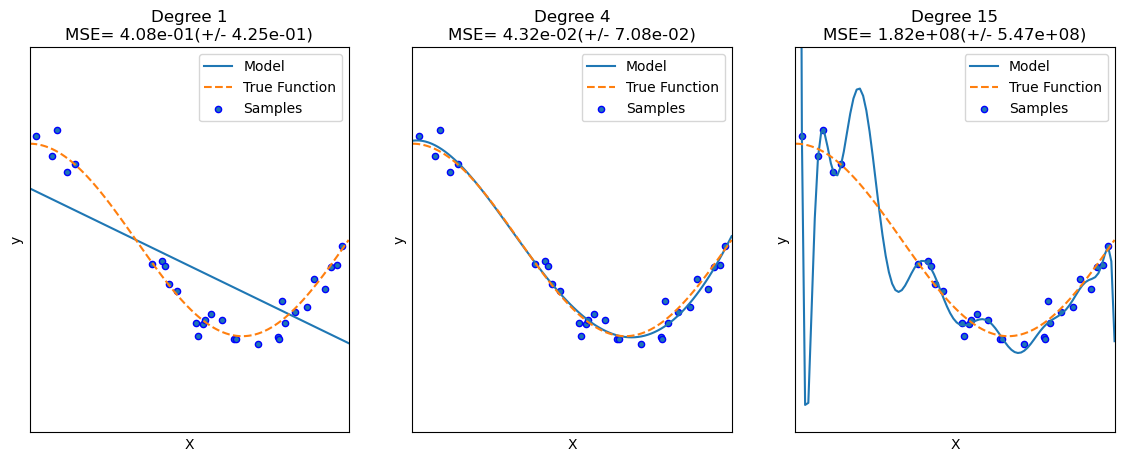

In [43]:
# 다항 회귀 degree 바꿔가며 모델 성능 점수 확인

degrees = [1,4,15]
plt.figure(figsize=(14,5))


for i in range(len(degrees)):
    # for 구문 돌 때마다, 그래프 추가
    ax = plt.subplot(1,len(degrees), i+1)
    
    plt.setp(ax, xticks=(), yticks=())
    

	# 각 degree 별로 Polynominal & LinearRegression 변환
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear = LinearRegression()
    
	# 일련에 처리 되는 pipeline 생성
    pipeLine = Pipeline( [('poly',poly), ('LRegression',linear)])
    
	# X 2D 변환 후 대입
    pipeLine.fit(X.reshape(-1,1), y)
    

	# 교차 검증으로 다항회귀 평가
	# k 폴드 세트 10개 생성
    scores = cross_val_score(pipeLine, X.reshape(-1,1), y, 
                             scoring="neg_mean_squared_error", cv=10)
    
	# 회귀계수 추출
    coeff = pipeLine.named_steps['LRegression'].coef_
    
    print('\nDegree {0} 회귀계수는 {1} 입니다.'.format(degrees[i], np.round(coeff, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    

	# test 데이터 셋 생성
	# 0~1까지 100개 나눈
    X_test = np.linspace(0,1,100)

	# 예측값 곡선
    plt.plot(X_test, pipeLine.predict(X_test[:, np.newaxis]), label='Model')
	# 실제값 곡선
    plt.plot(X_test, true_func(X_test),'--', label='True Function')
    plt.scatter(X, y, edgecolors='b', s=20, label='Samples')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title('Degree {0}\nMSE= {1:.2e}(+/- {2:.2e})'.format(degrees[i],  -scores.mean(), scores.std()))

    